In [1]:
import sys
sys.path.append('..')

In [2]:
import string
from pathlib import Path
from random import seed, randint, choices, choice

import numpy as np
from PIL import Image, ImageDraw, ImageFilter, ImageFont, ImageOps
from tqdm import tqdm

from allometry.const import DATA_DIR, CONTEXT_SIZE
from allometry.training_data import TrainingData, FONTS

In [3]:
trainer = TrainingData(1)

1979_dot_matrix
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF304B3D0>


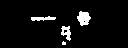

B612Mono-Bold
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF302D970>


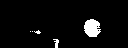

B612Mono-Regular
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1FD0>


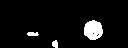

CourierPrime-Bold
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1FA0>


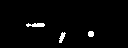

CourierPrime-BoldItalic
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1EB0>


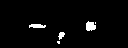

CourierPrime-Italic
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF304B760>


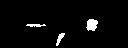

CourierPrime-Regular
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF302DC40>


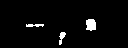

CutiveMono-Regular
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF304B5B0>


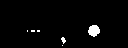

DOTMATRI
<PIL.Image.Image image mode=L size=128x48 at 0x7F2F1C52F310>


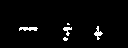

FiraMono-Bold
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1E80>


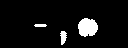

FiraMono-Medium
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1FA0>


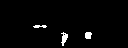

FiraMono-Regular
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1F40>


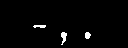

IBMPlexMono-Bold
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF304B3D0>


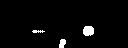

IBMPlexMono-Medium
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1E50>


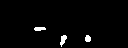

IBMPlexMono-SemiBold
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1E80>


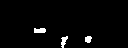

OverpassMono-Bold
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1EB0>


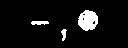

RobotoMono-Italic-VariableFont_wght
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF304B760>


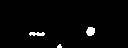

RobotoMono-VariableFont_wght
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1E50>


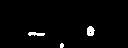

SourceCodePro-Black
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF304B520>


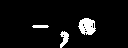

SourceCodePro-Bold
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1F10>


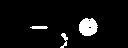

SourceCodePro-Medium
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1DF0>


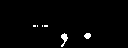

SourceCodePro-Regular
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1FD0>


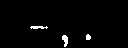

SourceCodePro-SemiBold
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC15B0>


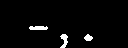

SpaceMono-Bold
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF304B760>


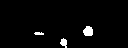

SyneMono-Regular
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1FD0>


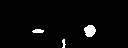

VT323-Regular
<PIL.Image.Image image mode=L size=128x48 at 0x7F2F1C52F190>


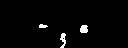

DottyRegular-vZOy
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF3041B20>


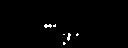

EHSMB
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF302D970>


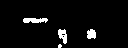

ELEKTRA_
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1BE0>


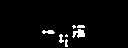

fake-receipt
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1EB0>


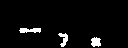

hydrogen
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF3041B20>


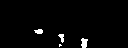

Merchant Copy Doublesize
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF302D970>


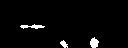

Merchant Copy Wide
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF302DC40>


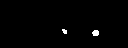

Merchant Copy
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1BE0>


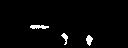

OcrB2
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1F70>


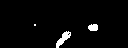

Ordre de Départ
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1FD0>


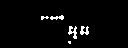

scoreboard
<PIL.Image.Image image mode=L size=128x48 at 0x7F2DF2FC1DF0>


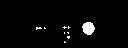

In [4]:
char = '-,.'
for font_path in FONTS:
    print(font_path.stem)

    image = trainer.char_image(char, font_path)

    display(image)